<a href="https://colab.research.google.com/github/kshitijain902/Machine_learning/blob/main/kaggle_fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [650]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [651]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/dataset/fish.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [652]:
df2=pd.get_dummies(df)
df2

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [653]:
x=df2.iloc[:,[2,3,4,5,6,7,8,9,10,11,12]].values
y=df2.iloc[:,1].values


In [654]:
print(f"{x.shape , y.shape}")

((159, 11), (159,))


In [655]:
x_train=x[:-60]

In [656]:
print(x_train.shape)

(99, 11)


In [657]:
x_test=x[-60:]

In [658]:
print(x_test.shape)

(60, 11)


In [659]:
y_train=y[:-60]

In [660]:
y_test=y[-60:]

In [661]:
print(y_train.shape,y_test.shape)

(99,) (60,)


In [662]:
u=np.mean(x_train,axis=0)
std=np.std(x,axis=0)
x_train=(x_train-u)/std
x_test=(x_test-u)/std

In [663]:
print(x_train.shape,x_test.shape)
print(u.shape)

(99, 11) (60, 11)
(11,)


In [664]:
a=np.mean(y,axis=0)
print(a)

26.247169811320756


In [665]:
print(a.shape)
b=np.std(y,axis=0)

()


In [666]:
print(b)

9.96495627814052


In [667]:
y_test=(y_test-a)/b

In [668]:
y_train=(y_train-a)/b

In [669]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

<ipython-input-670-2aba1eb0b1dd>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


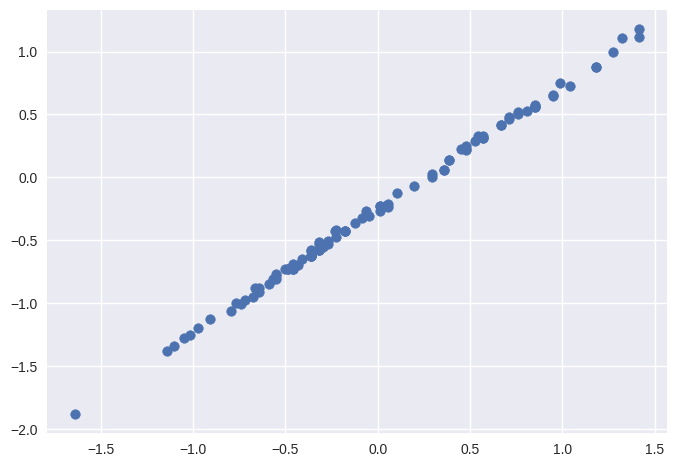

In [670]:
plt.style.use('seaborn')
plt.scatter(x_train[:, 0], y_train)
plt.show()




In [671]:
ones=np.ones((x_train.shape[0],1))
x_train=np.hstack((ones,x_train))

In [672]:
print(x_train[:5,])

[[ 1.         -0.04585963  0.07776266  0.39730796 -0.13290042  1.56026023
  -0.43785208 -0.57096971  0.         -0.60921351  0.         -0.31804739]
 [ 1.          0.03838971  0.18144621  0.62198984  0.03704959  1.56026023
  -0.43785208 -0.57096971  0.         -0.60921351  0.         -0.31804739]
 [ 1.          0.05711179  0.17280591  0.59807059  0.2694217   1.56026023
  -0.43785208 -0.57096971  0.         -0.60921351  0.         -0.31804739]
 [ 1.          0.29113774  0.38017301  0.68050075  0.12624954  1.56026023
  -0.43785208 -0.57096971  0.         -0.60921351  0.         -0.31804739]
 [ 1.          0.29113774  0.42337449  0.61356427  0.5299998   1.56026023
  -0.43785208 -0.57096971  0.         -0.60921351  0.         -0.31804739]]


In [673]:
def hypothesis(x, theta):
    return np.dot(x, theta)

In [674]:
def cost(X, Y, theta):
    m = X.shape[0]
    total_error = 0

    y_p = hypothesis(X, theta)
    total_error = np.sum((y_p - Y)**2)

    return total_error/m

In [675]:
def gradient(X, Y, theta):

    y_p = hypothesis(X, theta)

    grad = np.dot(X.T, (y_p - Y))

    return grad/X.shape[0]

In [676]:
def gradient_descent(X, Y, learning_rate = 0.05, max_steps = 1000):

    m, n = X.shape
    theta = np.zeros((n, ))
    cost_epoch = []

    for i in range(max_steps):

        grad = gradient(X, Y, theta)

        e = cost(X, Y, theta)
        cost_epoch.append(e)

        theta = theta - learning_rate*grad

    return theta, cost_epoch

In [677]:
theta, cost_epoch = gradient_descent(x_train, y_train)

In [678]:
theta

array([-0.2516595 ,  0.38730294,  0.36758635,  0.10511841,  0.1183149 ,
       -0.05278506, -0.00607353,  0.03342586,  0.        ,  0.01821139,
        0.        ,  0.00738168])

In [679]:
cost_epoch

[0.48155314957717504,
 0.339435265879034,
 0.2465565820278369,
 0.18527680602644367,
 0.14433376920662283,
 0.116530712968752,
 0.09726297829770253,
 0.08357932820183503,
 0.0735838040992398,
 0.06605449792405423,
 0.06020050774884885,
 0.055506930911378996,
 0.051635954339096,
 0.04836369665455155,
 0.045539841401747286,
 0.04306180421675473,
 0.04085817262424699,
 0.03887806544358801,
 0.03708427442802887,
 0.035448825231656406,
 0.033950088269878075,
 0.03257088451923014,
 0.03129723176040212,
 0.030117504584686084,
 0.02902186301543345,
 0.02800185663130895,
 0.02705014431205578,
 0.02616029097368202,
 0.025326616259812956,
 0.024544078876050146,
 0.023808185858005333,
 0.02311491967561128,
 0.022460678413514613,
 0.021842225787487294,
 0.02125664875210206,
 0.02070132111218858,
 0.02017387198933831,
 0.01967215829154757,
 0.019194240538161267,
 0.018738361535264907,
 0.018302927499024003,
 0.017886491299459472,
 0.017487737553435554,
 0.017105469338917868,
 0.01673859633660968,
 0

In [680]:
ones=np.ones((x_test.shape[0],1))
x_test=np.hstack((ones,x_test))


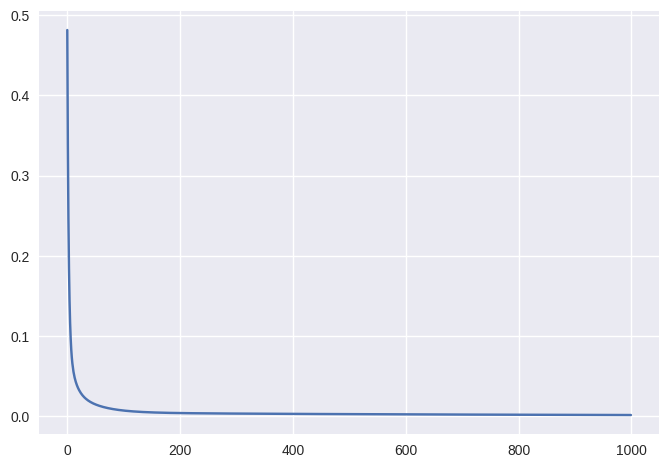

In [681]:
plt.plot(cost_epoch)

In [682]:
y_pred_test=[]
for i in range(x_test.shape[0]):
    pred=hypothesis(x_test[i],theta)
    y_pred_test.append(pred)
y_pred_test=np.array(y_pred_test)

In [683]:
for i in range(len(y_pred_test)):
    print(y_pred_test[i],y_test[i])

-0.4039931311202729 -0.32585891203997175
-0.3242604538490375 -0.27568307724009233
-0.2516247545856331 -0.12515557284045406
-0.10203915115926944 -0.10508523892050238
-0.1733570466144582 -0.08501490500055067
-0.17620107167945856 -0.08501490500055067
-0.15423542635012324 -0.08501490500055067
-0.13248771814799326 -0.03483907020067126
-0.0603043312646826 0.06551259939908759
0.044805785132156356 0.15582910203887076
0.3696990594121885 0.4267786099582196
0.5423219085634334 0.5773061143578578
0.7153097716048393 0.6274819491577373
0.7431464591658543 0.7780094535573755
0.6874230503337269 0.7780094535573755
0.730646109351418 0.8281852883572549
0.7281735628715877 0.838220455317231
0.9606118545701179 1.0288886275567726
0.855680505586172 1.0288886275567726
0.9792909035656483 1.0389237945167487
1.0176902723935815 1.069029295396676
1.027506378575685 1.079064462356652
1.0570556011867869 1.079064462356652
0.9709771442722486 1.0890996293166282
1.167937693682504 1.2797678015561698
1.2306910609098962 1.3600

In [684]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print('Accuracy',metrics.explained_variance_score(y_test,y_pred_test))

MAE 0.22225262818530392
MSE 0.09116669912273238
RMSE 0.3019382372650612
Accuracy 0.9743865811034963
